Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)
Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


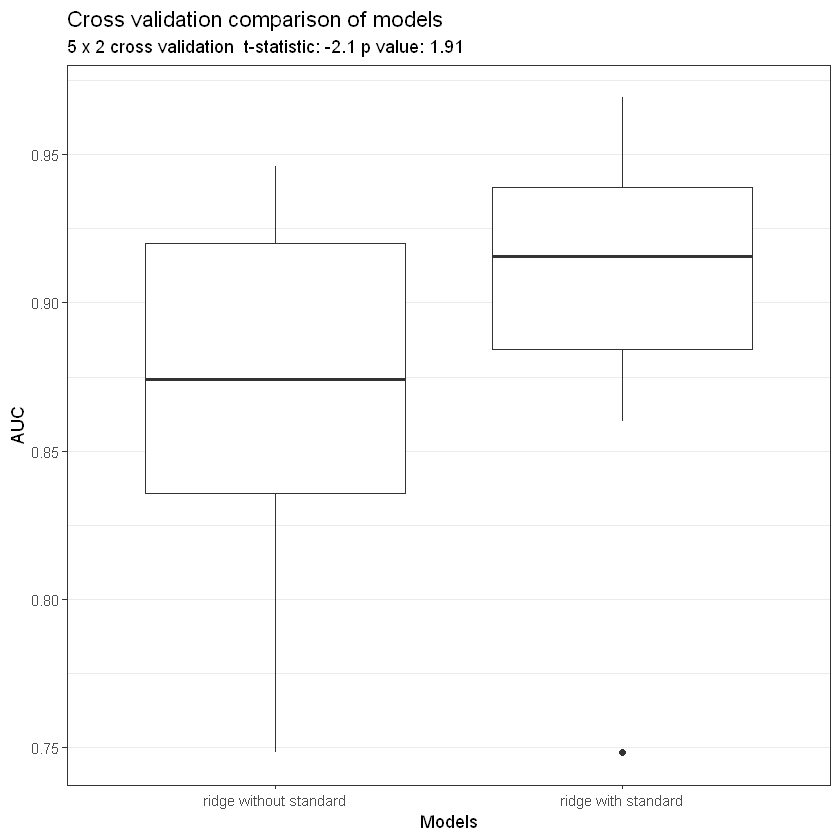

In [4]:
source("helpers.r")
library(glmnet)

learner_A <- function(training, test) {
  name <- "ridge without standard"
  
  
  x <- model.matrix(target ~ ., training)[,-1]
  y <- ifelse(training$target == "no_disease", 0, 1)
  fit <- glmnet(x, y, alpha = 0, family = "binomial", lambda =0.3, standardize = FALSE)
  
  x_test  <- model.matrix(target ~ ., test)[,-1]
  y_probabilities <- predict(fit, x_test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
  
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}

learner_B <- function(training, test) {
  name <- "ridge with standard"
  
  arg <- preProcess(training, method=c("center", "scale"))
  training_scaled <- predict(arg, training)
  test_scaled  <- predict(arg, test)

  
  x <- model.matrix(target ~ ., training_scaled)[,-1]
  y <- ifelse(training_scaled$target == "no_disease", 0, 1)
  fit <- glmnet(x, y, alpha = 0, family = "binomial", lambda =0.3, standardize = FALSE)
  
  x_test  <- model.matrix(target ~ ., test_scaled)[,-1]
  y_probabilities <- predict(fit, x_test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
  
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}


result <- cross_validation_selection(learner_A, learner_B)


plot_result(result)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)
Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


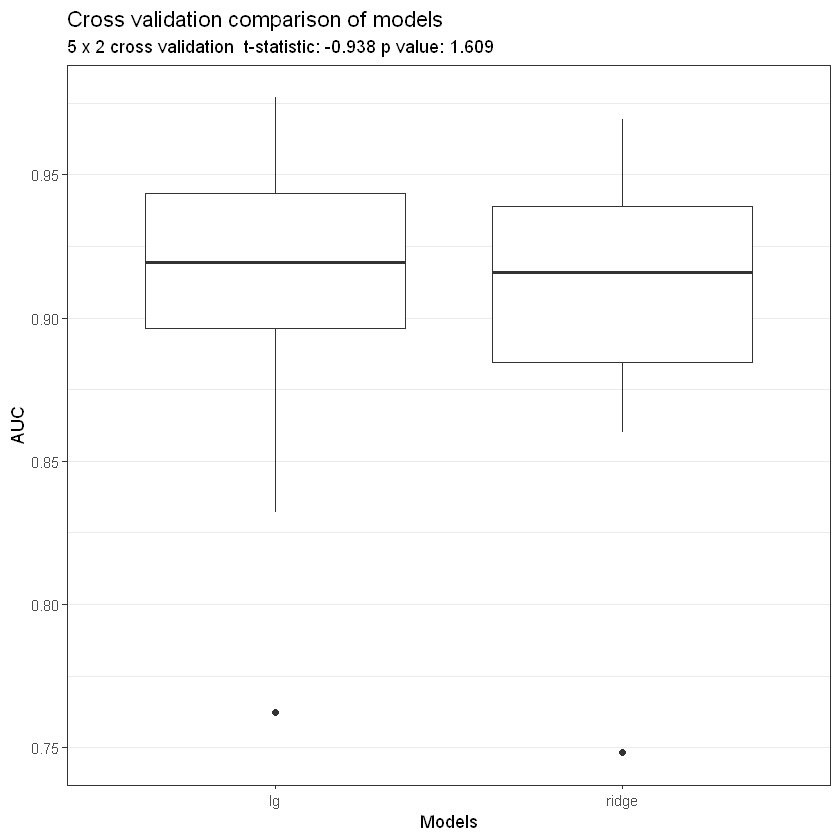

In [9]:
rm(list = ls())

source("helpers.r")
library(glmnet)

learner_A <- function(training, test) {
  name <- "lg"
    
  fit <- glm(target ~ ., data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}

learner_B <- function(training, test) {
  name <- "ridge"
  
  arg <- preProcess(training, method=c("center", "scale"))
  training_scaled <- predict(arg, training)
  test_scaled  <- predict(arg, test)

  
  x <- model.matrix(target ~ ., training_scaled)[,-1]
  y <- ifelse(training_scaled$target == "no_disease", 0, 1)
  fit <- glmnet(x, y, alpha = 0, family = "binomial", lambda =0.3, standardize = FALSE)
  
  x_test  <- model.matrix(target ~ ., test_scaled)[,-1]
  y_probabilities <- predict(fit, x_test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
  
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}


result <- cross_validation_selection(learner_A, learner_B)


plot_result(result)